## Plot 15min TDR RepPeriods

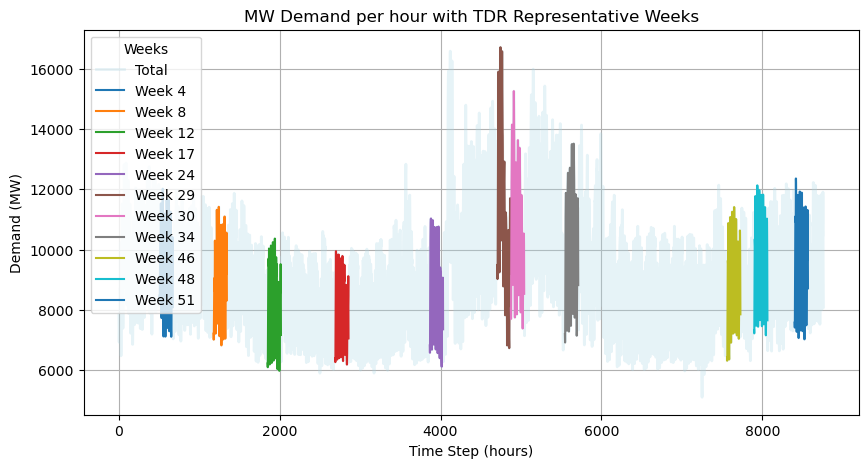

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files into pandas DataFrames
Period_map = pd.read_csv(r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\TDR_results\Period_map.csv", na_values="NA")
demand = pd.read_csv(r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\system\Demand_data.csv", na_values="NA")

# Find array of unique representative periods
rep_periods = Period_map["Rep_Period"].unique()

# Create an array of the time steps and MW values of each representative period
weeks_demand = []
for i in rep_periods:
    start_idx = 168* i - 167  # Start index
    end_idx = 168* i        # End index to include all necessary rows

    # Create the DataFrame for this week
    week_temp_demand = pd.DataFrame({
        'Week': [i] * (end_idx - start_idx),  # Repeat 'Week' for the correct number of rows
        'hour': demand.loc[start_idx:end_idx - 1, "Time_Index"].values,  # Adjust slicing
        'MW': demand.loc[start_idx:end_idx - 1, "Demand_MW_z1"].values   # Adjust slicing
    })

    # Append this week's data to the list
    weeks_demand.append(week_temp_demand)

# Combine with Total (pre TDR)
demand_plot = pd.DataFrame({
    'Week': ['Total']*8760,
    'hour': demand["Time_Index"].values,
    'MW': demand["Demand_MW_z1"].values
})

# Combine the Total demand data and the representative weeks data
weeks_demand_df = pd.concat(weeks_demand)
demand_with_TDR = pd.concat([weeks_demand_df, demand_plot])

# Convert hour and MW to appropriate types
demand_with_TDR['hour'] = demand_with_TDR['hour'].astype(int)
demand_with_TDR['MW'] = demand_with_TDR['MW'].astype(float)

# Plot using Matplotlib
plt.figure(figsize=(10, 5))

# Then, plot the "Total" week last
grp_total = demand_with_TDR[demand_with_TDR['Week'] == 'Total']
plt.plot(grp_total['hour'], grp_total['MW'], label='Total', linewidth=2, color='lightblue', alpha=0.3)

# First, plot all representative weeks (excluding "Total")
for key, grp in demand_with_TDR.groupby(['Week']):
    if key != ('Total',):
        plt.plot(grp['hour'], grp['MW'], label=f'Week {key[0]}')

# Customize the plot
plt.title('MW Demand per hour with TDR Representative Weeks')
plt.xlabel('Time Step (hours)')
plt.ylabel('Demand (MW)')
plt.legend(title="Weeks")
plt.grid(True)

# Show the plot
plt.show()

In [20]:
demand_TDR = pd.read_csv(r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\TDR_results\Demand_data.csv", na_values="NA")
demand_TDR


,Voll,Demand_Segment,Cost_of_Demand_Curtailment_per_MW,Max_Demand_Curtailment,$/MWh,Rep_Periods,Timesteps_per_Rep_Period,Sub_Weights,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3
0,50000.0,1.0,1.00,1.000,2000.0,11.0,168.0,673.846154,1,8761.0,2502.0,1195.0
1,NaN,2.0,0.90,0.040,1800.0,NaN,NaN,1179.230769,2,8474.0,2420.0,1156.0
2,NaN,3.0,0.55,0.024,1100.0,NaN,NaN,1010.769231,3,8336.0,2380.0,1136.0
3,NaN,4.0,0.20,0.003,400.0,NaN,NaN,842.307692,4,8275.0,2364.0,1128.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2358.461538,5,8330.0,2379.0,1136.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1844,11099.0,3170.0,1513.0
1844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1845,10825.0,3091.0,1476.0
1845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1846,10312.0,2945.0,1406.0
1846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1847,9579.0,2735.0,1306.0


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


demand_TDR = pd.read_csv(r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\TDR_results\Demand_data.csv", na_values="NA")
Period_map = pd.read_csv(r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\TDR_results\Period_map.csv", na_values="NA")

# Find array of unique representative periods
rep_periods = Period_map['Rep_Period'].unique()

# Create an array of the time steps and MW values of each representative period
weeks_demand = []
for i in rep_periods:
    print(f"Rep Period {i}: Expected 168 rows, got {week_temp_demand.shape[0]} rows.")
    week_temp_demand = np.column_stack((
        np.repeat(i, 167), 
        demand_TDR.iloc[168*i-167:168*i]["Time_Index"].values, 
        demand_TDR.iloc[168*i-167:168*i]["Demand_MW_z1"].values
    ))
    weeks_demand.append(week_temp_demand)

    

# Combine with Total (pre TDR)
demand_plot = np.column_stack((
    np.repeat("Total", 8760),
    demand_TDR["Time_Index"].values,
    demand_TDR["Demand_MW_z1"].values
))

# Concatenate weeks_demand with demand_plot
weeks_demand = np.vstack(weeks_demand)
demand_with_TDR = np.vstack([demand_plot, weeks_demand])

# Convert to DataFrame
demand_with_TDR_df = pd.DataFrame(demand_with_TDR, columns=["Week", "hour", "MW"])
demand_with_TDR_df["hour"] = demand_with_TDR_df["hour"].astype(int)
demand_with_TDR_df["MW"] = demand_with_TDR_df["MW"].astype(float)

# Plot using matplotlib
plt.figure(figsize=(12, 6))
for week in demand_with_TDR_df["Week"].unique():
    week_data = demand_with_TDR_df[demand_with_TDR_df["Week"] == week]
    plt.plot(week_data["hour"], week_data["MW"], label=f"Week {week}")

plt.xlabel("Time Step (hours)")
plt.ylabel("Demand (MW)")
plt.title("MW Demand per hour with TDR Representative Weeks")
plt.legend(title="Week")
plt.grid(True)
plt.show()

Rep Period 4: Expected 168 rows, got 167 rows.
Rep Period 8: Expected 168 rows, got 167 rows.
Rep Period 12: Expected 168 rows, got 167 rows.


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 167 and the array at index 1 has size 0